Stress detection is a challenging task, as there are so many words that can be used by people on their posts that can show whether a person is having psychological stress or not.


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("stress.csv")
print(data.head())

      id      subreddit  ... syntax_fk_grade sentiment
0    896  relationships  ...       -0.148707  0.000000
1  19059        anxiety  ...        7.398222 -0.065909
2   7977           ptsd  ...        3.149288 -0.036818
3   1214           ptsd  ...        6.606000 -0.066667
4   1965  relationships  ...        4.801869  0.141667

[5 rows x 116 columns]


In [2]:
#Check for null values:
print(data.isnull().sum().sum())

0


In [3]:
#let’s prepare the text column of this dataset by cleaning the text column with stopwords, links, special symbols and language errors:
import nltk
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('wordnet')
lemm = WordNetLemmatizer()
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text= " ".join(text)
    text = [lemm.lemmatize(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
data["text"]

0      like want not“ problem take longer asked frien...
1      man front desk title hr customer service repre...
2      wed saving much money new housrits expensive c...
3      ex used shoot back want go time matter almost ...
4      haven’t said anything yet i’m sure someone wou...
                             ...                        
710    horrible vivid nightmare every night sometimes...
711    also cant think without getting angry jealous ...
712    furthermore told got really serious anxiety de...
713    here link amazon wish list two item  link does...
714    keep u protected already told unwelcome person...
Name: text, Length: 715, dtype: object

let’s have a look at the most used words by the people sharing about their life problems on social media by visualizing a word cloud of the text column:


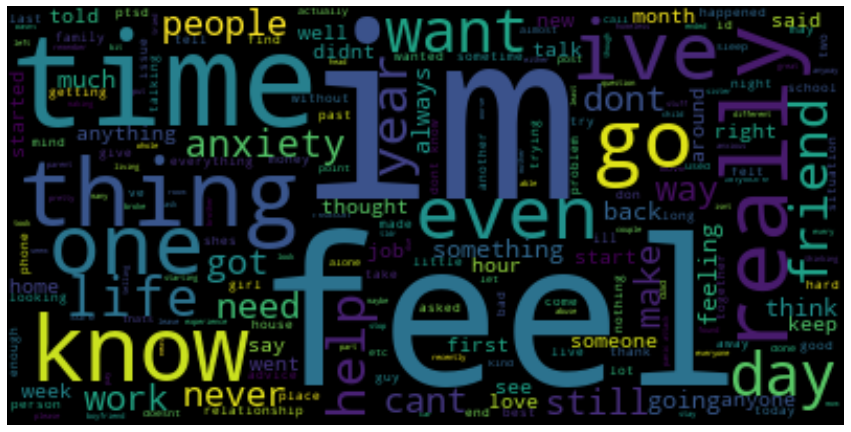

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
#Prepare label column in this dataset:
data["label"] = data["label"].map({0: "No Stress", 1: "Stress"})
data = data[["text", "label"]]
print(data.head())

                                                text      label
0  like want not“ problem take longer asked frien...  No Stress
1  man front desk title hr customer service repre...  No Stress
2  wed saving much money new housrits expensive c...     Stress
3  ex used shoot back want go time matter almost ...     Stress
4  haven’t said anything yet i’m sure someone wou...  No Stress


Let's split this dataset into training and test sets:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["text"])
y = np.array(data["label"])

cv = CountVectorizer()
X = cv.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.33, 
                                                random_state=42)

Let's use the Bernoulli Naive Bayes algorithm, which is one of the best algorithms for binary classification problems.

In [8]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [9]:
score= model.score(X_test,y_test)

In [10]:
print(f"Model accuracy = {score}")

Model accuracy = 0.6864406779661016


SVM Model:


In [11]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [12]:
clf.score(X_test,y_test)

0.6694915254237288

As shown from the above results, Bernoulli Naive Bayes algorithm is better.

In [14]:
inpt = input("Enter a Text: ")
data = cv.transform([inpt]).toarray()
output = clf.predict(data)
print(output)

Enter a Text: Sometime I feel like I need some help
['Stress']


In [19]:
inpt = input("Enter a Text: ")
data = cv.transform([inpt]).toarray()
output = clf.predict(data)
print(output)

Enter a Text: I feel happy seeing people around
['No Stress']


In [18]:
inpt = input("Enter a Text: ")
data = cv.transform([inpt]).toarray()
output = model.predict(data)
print(output)

Enter a Text: I feel stressed
['Stress']


In [22]:
inpt = input("Enter a Text: ")
data = cv.transform([inpt]).toarray()
output = model.predict(data)
print(output)

Enter a Text: People need to take care of their mental health
['No Stress']
